### FCNN model

pass the requirement for n=9,12,15,18,24

Run multiple times with error bar possible

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2

# Set a global seed for reproducibility
def set_global_seed(seed_value):
    import os
    import random
    import numpy as np
    import tensorflow as tf
    
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

def lr_scheduler(epoch, lr):
    initial_lr = 0.001  # This should match your initial learning rate in the optimizer
    if epoch > 50:
        return lr * 0.5  # Keep half of the initial learning rate
    return initial_lr

def build_fully_connected_model(input_dim):
    """
    构建简单的全连接神经网络模型
    :param input_dim: 输入特征的维度
    :return: 编译后的 Keras 模型
    """
    input_layer = Input(shape=(input_dim,), name="input_layer")

    # 隐藏层 1：128 个神经元
    x = Dense(128, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # 隐藏层 2：64 个神经元
    x = Dense(64, activation="relu", kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # 输出层：1 个神经元（sigmoid 激活函数）
    output_layer = Dense(1, activation="sigmoid", name="output_layer")(x)

    # 定义模型
    model = Model(inputs=input_layer, outputs=output_layer)

    # 编译模型
    model.compile(optimizer=Adam(learning_rate=0.001), 
                loss="binary_crossentropy", 
                metrics=["accuracy"])
    return model

def run_fully_connected_model(n, seed):
    """
    使用简单的全连接神经网络对数据集进行训练和评估
    """
    # 加载数据
    X = np.load(f'Datasets/kryptonite-{n}-X.npy') 
    y = np.load(f'Datasets/kryptonite-{n}-y.npy')

    # 数据划分
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # 数据标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # 构建模型
    model = build_fully_connected_model(X_train_scaled.shape[1])

    # 定义回调
    early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
    lr_callback = LearningRateScheduler(lr_scheduler)

    # 模型训练
    history = model.fit(
        X_train_scaled,
        y_train,
        epochs=100,
        batch_size=64,
        validation_data=(X_val_scaled, y_val),
        callbacks=[early_stopping, lr_callback],
        verbose=1,
    )

    # 保存模型
    model.save(f"models/model_fully_connected_{n}_{seed}.keras")
    print(f"Model saved")

    # 测试集评估
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy


possible_n_vals = [9, 12, 15, 18]
SEEDS = [40, 42, 44]
acc_list = {seed: [] for seed in SEEDS}

for seed in SEEDS:
    # 设置随机种子
    set_global_seed(seed)
    for n in possible_n_vals:
        print(f"Testing with n={n} and SEED={seed}")
        accuracy = run_fully_connected_model(n, seed)
        acc_list[seed].append(accuracy)

# 打印结果
for seed, accuracies in acc_list.items():
    for idx, accuracy in enumerate(accuracies):
        print(f"Accuracy achieved for SEED {seed}: {accuracy} with n={possible_n_vals[idx]}")


Testing with n=9 and SEED=40
Epoch 1/100
113/113 [==============================] - 2s 5ms/step - loss: 0.9019 - accuracy: 0.5193 - val_loss: 0.7888 - val_accuracy: 0.5348 - lr: 0.0010
Epoch 2/100
113/113 [==============================] - 0s 3ms/step - loss: 0.8340 - accuracy: 0.5281 - val_loss: 0.7714 - val_accuracy: 0.5528 - lr: 0.0010
Epoch 3/100
113/113 [==============================] - 0s 3ms/step - loss: 0.7868 - accuracy: 0.5646 - val_loss: 0.7380 - val_accuracy: 0.6357 - lr: 0.0010
Epoch 4/100
113/113 [==============================] - 0s 3ms/step - loss: 0.7430 - accuracy: 0.6081 - val_loss: 0.6917 - val_accuracy: 0.7061 - lr: 0.0010
Epoch 5/100
113/113 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.6539 - val_loss: 0.6103 - val_accuracy: 0.8544 - lr: 0.0010
Epoch 6/100
113/113 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.7186 - val_loss: 0.5239 - val_accuracy: 0.8876 - lr: 0.0010
Epoch 7/100
113/113 [==============

### Testing


In [21]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model

def set_global_seed(seed_value):
    import os
    import random
    import numpy as np
    import tensorflow as tf
    
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

def testing(n, add, seed, fcn):
    if add:
        # Load dataset
        X = np.load(f'Datasets/additional-kryptonite-{n}-X.npy') 
        y = np.load(f'Datasets/additional-kryptonite-{n}-y.npy')
    else:
        # Load dataset
        X = np.load(f'Datasets/kryptonite-{n}-X.npy') 
        y = np.load(f'Datasets/kryptonite-{n}-y.npy')

    # Shuffle and split the data
    _, X_temp, _, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
    _, X_test, _, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test)

    if fcn:
        model = load_model(f"models/model_fully_connected_{n}_{seed}.keras")
    else:
        model = load_model(f"models/model_kryptonite_{n}_{seed}.keras")

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    #print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy

### FCNN testing

In [22]:
possible_n_vals = {9:0,12:0,15:0,18:0}
SEEDS = [40, 42, 44]
acc_list_FCN = {seed: [] for seed in SEEDS}  # Initialize dictionary with empty lists for each seed

for seed in SEEDS:
    # Set a global seed for reproducibility
    set_global_seed(seed)
    for n, add in possible_n_vals.items():
        print(f"Testing with n={n} and SEED={seed}")
        accuracy = testing(n, add, seed, fcn=1)
        acc_list_FCN[seed].append(accuracy)  # Append accuracy to the corresponding seed's list

# Print the results
for seed, accuracies in acc_list_FCN.items():
    for idx, accuracy in enumerate(accuracies):
        print(f"Accuracy achieved for SEED {seed}: {accuracy} with n={list(possible_n_vals.keys())[idx]}")

Testing with n=9 and SEED=40
Testing with n=12 and SEED=40
Testing with n=15 and SEED=40
Testing with n=18 and SEED=40
Testing with n=9 and SEED=42
Testing with n=12 and SEED=42
Testing with n=15 and SEED=42
Testing with n=18 and SEED=42
Testing with n=9 and SEED=44
Testing with n=12 and SEED=44
Testing with n=15 and SEED=44
Testing with n=18 and SEED=44
Accuracy achieved for SEED 40: 0.9622222185134888 with n=9
Accuracy achieved for SEED 40: 0.9598610997200012 with n=12
Accuracy achieved for SEED 40: 0.9382222294807434 with n=15
Accuracy achieved for SEED 40: 0.8758333325386047 with n=18
Accuracy achieved for SEED 42: 0.9609259366989136 with n=9
Accuracy achieved for SEED 42: 0.9588888883590698 with n=12
Accuracy achieved for SEED 42: 0.9306666851043701 with n=15
Accuracy achieved for SEED 42: 0.7521296143531799 with n=18
Accuracy achieved for SEED 44: 0.9609259366989136 with n=9
Accuracy achieved for SEED 44: 0.9590277671813965 with n=12
Accuracy achieved for SEED 44: 0.9401111006736

In [23]:
acc_list_FCN

{40: [0.9622222185134888,
  0.9598610997200012,
  0.9382222294807434,
  0.8758333325386047],
 42: [0.9609259366989136,
  0.9588888883590698,
  0.9306666851043701,
  0.7521296143531799],
 44: [0.9609259366989136,
  0.9590277671813965,
  0.9401111006736755,
  0.8726851940155029]}

### WDNN testing

In [24]:
possible_n_vals = {9:0,12:0,15:0,18:0,24:1}
SEEDS = [40, 42, 44]
acc_list_WDNN = {seed: [] for seed in SEEDS}  # Initialize dictionary with empty lists for each seed

for seed in SEEDS:
    # Set a global seed for reproducibility
    set_global_seed(seed)
    for n, add in possible_n_vals.items():
        print(f"Testing with n={n} and SEED={seed}")
        accuracy = testing(n, add, seed, fcn=0)
        acc_list_WDNN[seed].append(accuracy)  # Append accuracy to the corresponding seed's list

# Print the results
for seed, accuracies in acc_list_WDNN.items():
    for idx, accuracy in enumerate(accuracies):
        print(f"Accuracy achieved for SEED {seed}: {accuracy} with n={list(possible_n_vals.keys())[idx]}")

Testing with n=9 and SEED=40
Testing with n=12 and SEED=40
Testing with n=15 and SEED=40
Testing with n=18 and SEED=40
Testing with n=24 and SEED=40
Testing with n=9 and SEED=42
Testing with n=12 and SEED=42
Testing with n=15 and SEED=42
Testing with n=18 and SEED=42
Testing with n=24 and SEED=42
Testing with n=9 and SEED=44
Testing with n=12 and SEED=44
Testing with n=15 and SEED=44
Testing with n=18 and SEED=44
Testing with n=24 and SEED=44
Accuracy achieved for SEED 40: 0.9612963199615479 with n=9
Accuracy achieved for SEED 40: 0.9604166746139526 with n=12
Accuracy achieved for SEED 40: 0.9536666870117188 with n=15
Accuracy achieved for SEED 40: 0.915925920009613 with n=18
Accuracy achieved for SEED 40: 0.8293733596801758 with n=24
Accuracy achieved for SEED 42: 0.9616666436195374 with n=9
Accuracy achieved for SEED 42: 0.960972249507904 with n=12
Accuracy achieved for SEED 42: 0.9478889107704163 with n=15
Accuracy achieved for SEED 42: 0.9004629850387573 with n=18
Accuracy achieved

In [25]:
acc_list_WDNN

{40: [0.9612963199615479,
  0.9604166746139526,
  0.9536666870117188,
  0.915925920009613,
  0.8293733596801758],
 42: [0.9616666436195374,
  0.960972249507904,
  0.9478889107704163,
  0.9004629850387573,
  0.9113600254058838],
 44: [0.9618518352508545,
  0.9586111307144165,
  0.9448888897895813,
  0.8778703808784485,
  0.8106799721717834]}

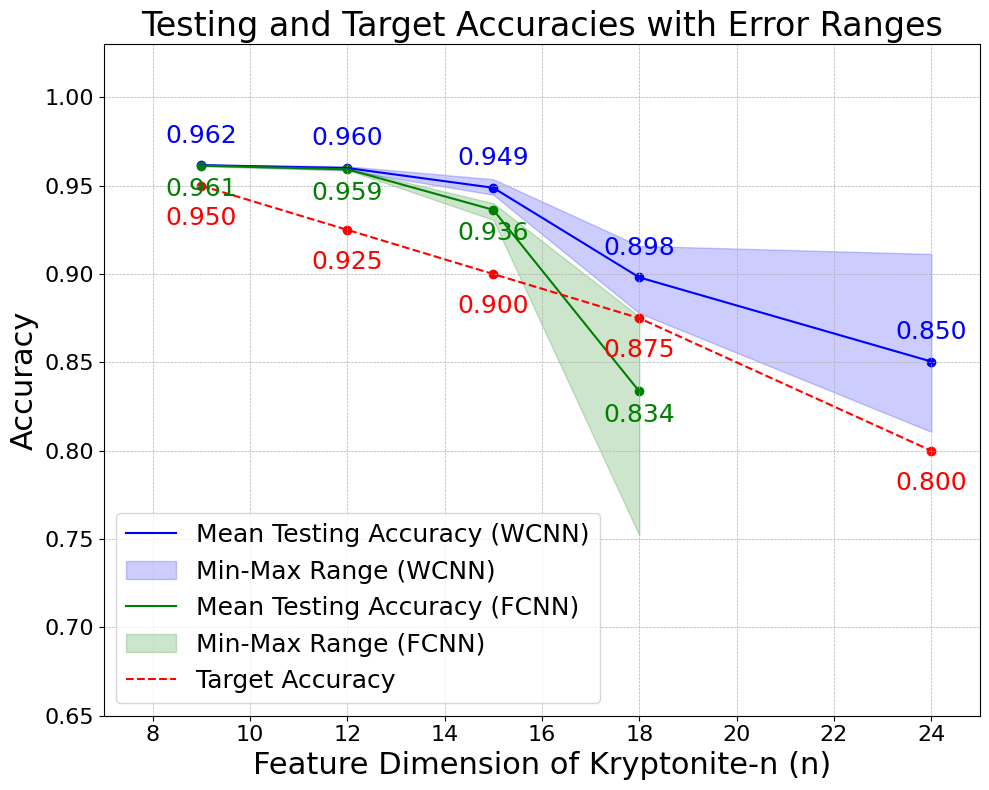

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data setup for seeds and accuracy results
n = [9, 12, 15, 18, 24]
seeds = [40, 42, 44]

succ = [0.95, 0.925, 0.9, 0.875, 0.8]  # Target accuracies

# Calculate mean, min, and max for error bars (WDNN)
acc_values = np.array([acc_list_WDNN[seed] for seed in seeds])
means = np.mean(acc_values, axis=0)
mins = np.min(acc_values, axis=0)
maxs = np.max(acc_values, axis=0)

# Plot style
plt.figure(figsize=(10, 8))
plt.style.use('default')
plt.grid(visible=True, which="both", linestyle='--', linewidth=0.5)

# Plot lines and scatter points for mean accuracies
plt.plot(n, means, color='blue', label="Mean Testing Accuracy (WCNN)")
plt.scatter(n, means, color='blue')

# Add error bars
plt.fill_between(n, mins, maxs, color='blue', alpha=0.2, label="Min-Max Range (WCNN)")

# Add annotations for mean accuracies
for x, y in zip(n, means):
    plt.text(x, y + 0.01, f'{y:.3f}', ha='center', va='bottom', fontsize=18, color='blue')

# Calculate mean, min, and max for error bars (FCNN)
acc_values = np.array([acc_list_FCN[seed] for seed in seeds])
means = np.mean(acc_values, axis=0)
mins = np.min(acc_values, axis=0)
maxs = np.max(acc_values, axis=0)

# Plot lines and scatter points for mean accuracies
plt.plot(n[:-1], means, color='green', label="Mean Testing Accuracy (FCNN)")
plt.scatter(n[:-1], means, color='green')

# Add error bars
plt.fill_between(n[:-1], mins, maxs, color='green', alpha=0.2, label="Min-Max Range (FCNN)")

# Plot target accuracies
plt.plot(n, succ, color='red', linestyle='--', label="Target Accuracy")
plt.scatter(n, succ, color='red')

# Add annotations for mean accuracies
for x, y in zip(n, means):
    plt.text(x, y - 0.02, f'{y:.3f}', ha='center', va='bottom', fontsize=18, color='green')

for x, y in zip(n, succ):
    plt.text(x, y - 0.025, f'{y:.3f}', ha='center', va='bottom', fontsize=18, color='red')

# Add legend
plt.legend(fontsize=18, loc="lower left")

# Adjust layout
plt.ylim((0.65, 1.03))
plt.xlim((7, 25))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("Feature Dimension of Kryptonite-n (n)", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.title("Testing and Target Accuracies with Error Ranges", fontsize=24)
plt.tight_layout()

# Save the plot instead of showing it
plt.savefig("Testing accuracy together.pdf")
plt.show()
plt.close()
